In [56]:
import yfinance as yf
import pandas as pd
import ta
from prophet import Prophet


from pycaret.regression import *


oro = yf.Ticker("GLD")

In [57]:
oro_data = oro.history(period="1y", interval="1d")
oro_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-10-09 00:00:00-04:00,241.160004,241.839996,240.639999,241.050003,4120500,0.0,0.0,0.0
2024-10-10 00:00:00-04:00,241.770004,243.020004,241.509995,242.820007,4792700,0.0,0.0,0.0
2024-10-11 00:00:00-04:00,244.500000,245.919998,244.470001,245.470001,5789500,0.0,0.0,0.0
2024-10-14 00:00:00-04:00,245.160004,245.860001,244.259995,245.070007,3922900,0.0,0.0,0.0
2024-10-15 00:00:00-04:00,244.990005,246.550003,244.529999,245.919998,5640800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-10-02 00:00:00-04:00,358.260010,358.670013,351.399994,354.790009,16162100,0.0,0.0,0.0
2025-10-03 00:00:00-04:00,357.119995,358.140015,355.799988,357.640015,14464000,0.0,0.0,0.0
2025-10-06 00:00:00-04:00,362.160004,365.299988,361.369995,364.380005,17093700,0.0,0.0,0.0


In [58]:
data = oro_data["Close"]
data

Date
2024-10-09 00:00:00-04:00    241.050003
2024-10-10 00:00:00-04:00    242.820007
2024-10-11 00:00:00-04:00    245.470001
2024-10-14 00:00:00-04:00    245.070007
2024-10-15 00:00:00-04:00    245.919998
                                ...    
2025-10-02 00:00:00-04:00    354.790009
2025-10-03 00:00:00-04:00    357.640015
2025-10-06 00:00:00-04:00    364.380005
2025-10-07 00:00:00-04:00    366.260010
2025-10-08 00:00:00-04:00    372.299988
Name: Close, Length: 250, dtype: float64

In [59]:
prophet_frame = data.reset_index()

In [62]:

prophet_frame.columns = ["ds", "y"]
prophet_frame["ds"] = prophet_frame["ds"].dt.tz_localize(None)
prophet_frame


,ds,y
0,2024-10-09,241.050003
1,2024-10-10,242.820007
2,2024-10-11,245.470001
3,2024-10-14,245.070007
4,2024-10-15,245.919998
...,...,...
245,2025-10-02,354.790009
246,2025-10-03,357.640015
247,2025-10-06,364.380005
248,2025-10-07,366.260010


In [63]:
m = Prophet()
m.fit(prophet_frame)

INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO	prophet:forecaster.py:parse_seasonality_args()- Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmpevkkp6ky/t2ushbhd.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: /tmp/tmpevkkp6ky/8lwjly7i.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['/opt/conda/envs/pycaret-env/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93293', 'data', 'file=/tmp/tmpevkkp6ky/t2ushbhd.json', 'init=/tmp/tmpevkkp6ky/8lwjly7i.json', 'output', 'file=/tmp/tmpevkkp6ky/prophet_modelyjly6qm9/prophet_model-20251008234738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10

In [64]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
610,2026-10-04
611,2026-10-05
612,2026-10-06
613,2026-10-07
614,2026-10-08


In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
610,2026-10-04,612.822161,464.438086,757.723252
611,2026-10-05,618.665236,470.233196,760.915140
612,2026-10-06,619.858497,470.881670,763.628437
613,2026-10-07,620.342151,469.317892,767.162118
614,2026-10-08,620.622297,471.924900,767.388694


WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic fa

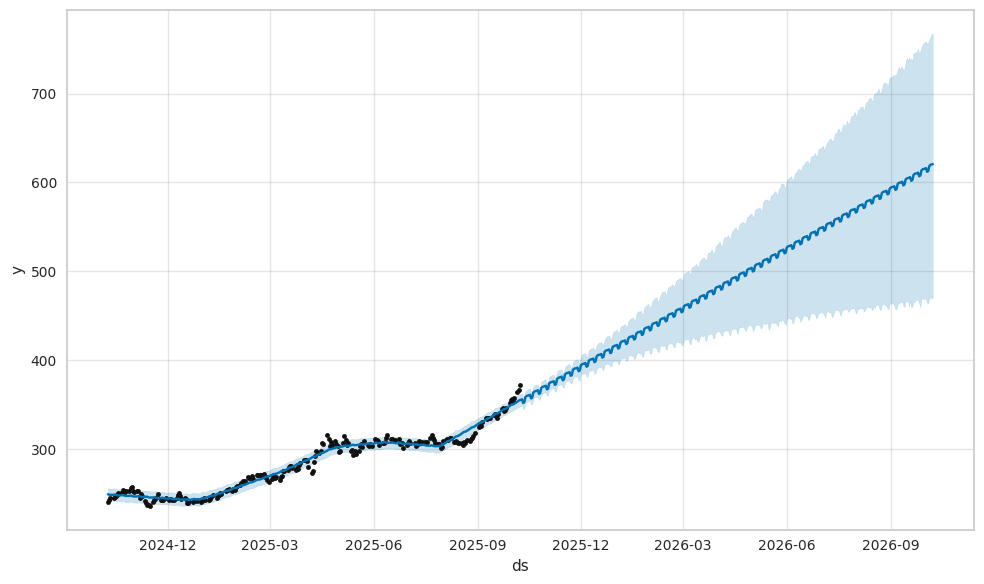

In [66]:
fig1 = m.plot(forecast)


In [25]:
data  = oro_data["Close"]
data = data.asfreq('D') 
data.fillna(method = "ffill", inplace = True)

<Axes: xlabel='Date'>

WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Generic fa

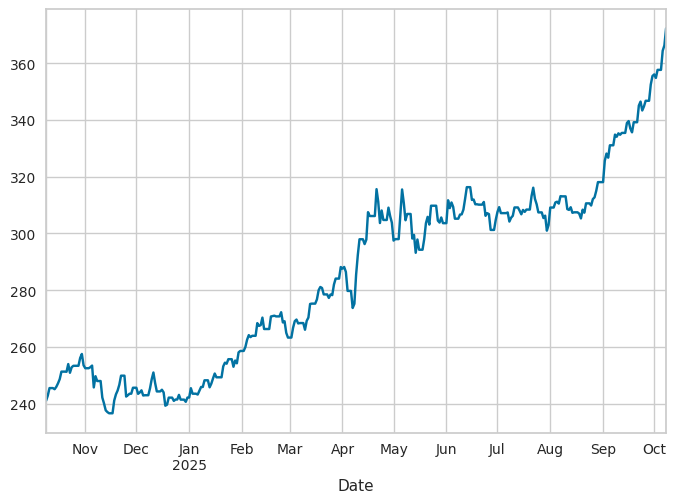

In [26]:
data.plot()

In [27]:
from pycaret.time_series import *

s = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(364, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [31]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [32]:
exp.setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(364, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [33]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,365.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,285.294
3,Summary,Statistics,Transformed,Median,,288.160004
4,Summary,Statistics,Transformed,Standard Deviation,,32.746923
5,Summary,Statistics,Transformed,Variance,,1072.360993
6,Summary,Statistics,Transformed,Kurtosis,,-0.947494
7,Summary,Statistics,Transformed,Skewness,,0.211906
8,Summary,Statistics,Transformed,# Distinct Values,,248.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",6777.521778


In [34]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
arima,ARIMA,0.1515,0.1143,1.9590,1.9590,0.0054,0.0054,0.3767
exp_smooth,Exponential Smoothing,0.1862,0.1404,2.4079,2.4079,0.0066,0.0067,1.2867
ets,ETS,0.1863,0.1405,2.4086,2.4086,0.0066,0.0067,1.0333
theta,Theta Forecaster,0.1965,0.1482,2.5406,2.5406,0.0070,0.0070,0.0400
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.1968,0.1484,2.5457,2.5457,0.0070,0.0070,0.1100
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.2189,0.1650,2.8325,2.8325,0.0078,0.0078,0.1267
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.2189,0.1650,2.8327,2.8327,0.0078,0.0078,0.1267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.2250,0.1696,2.9130,2.9130,0.0080,0.0081,0.1233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.2308,0.1741,2.9870,2.9870,0.0082,0.0083,0.3300
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.2309,0.1741,2.9882,2.9882,0.0082,0.0083,0.1300


In [35]:
# plot forecast
plot_model(best, plot = 'forecast')

In [37]:
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 50})

In [38]:
predict_model(best, fh = 36)

,y_pred
2025-10-08,365.3621
2025-10-09,364.4870
2025-10-10,363.6342
2025-10-11,370.3230
2025-10-12,372.0630
2025-10-13,369.8236
2025-10-14,373.4142
2025-10-15,372.6644
2025-10-16,371.9337
2025-10-17,374.9916
